In [1]:
import sys

sys.path.append("..")

In [2]:
# create agent and environment

from mini_rl.environments import GridWorld

# Create a 10x10 maze with a guaranteed path
env = GridWorld(
    width=10,
    height=10,
    start_pos=(0, 0),  # Start at top-left
    goal_pos=[(9, 9)],  # Goal at bottom-right
    obstacles=[
        # Top horizontal walls
        (0, 3),
        (1, 1),
        (1, 3),
        (1, 5),
        (1, 7),
        (1, 8),
        (2, 1),
        (2, 5),
        (2, 8),
        # Middle section
        (3, 1),
        (3, 3),
        (3, 5),
        (3, 7),
        (4, 3),
        (4, 5),
        (4, 7),
        (5, 0),
        (5, 1),
        (5, 7),
        (5, 9),
        # Bottom section
        (6, 1),
        (6, 3),
        (6, 5),
        (6, 7),
        (6, 9),
        (7, 1),
        (7, 3),
        (7, 5),
        (7, 6),
        (7, 7),
        (8, 1),
        (8, 3),
        (8, 5),
        (9, 5),
        (9, 8),
    ],
    terminal_reward=0.0,
    step_penalty=0.1,
    max_steps=200,
)

# Render the maze
print(env.render())

A . . # . . . . . .
. # . # . # . # # .
. # . . . # . . # .
. # . # . # . # . .
. . . # . # . # . .
# # . . . . . # . #
. # . # . # . # . #
. # . # . # # # . .
. # . # . # . . . .
. . . . . # . . # G



In [3]:
from mini_rl.agents import SarsaAgent
from mini_rl.policy import DeterministicTabularPolicy, EpsilonGreedyPolicy
from mini_rl.value_fns import TabularActionValueFunction

from IPython.display import clear_output
from time import sleep

# Create agent components
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Base policy (will be updated based on Q-values)
base_policy = DeterministicTabularPolicy(n_states, n_actions)

# Epsilon-greedy exploration policy
epsilon = 0.5
policy = EpsilonGreedyPolicy(base_policy, epsilon, decay_rate=0.9)

# Create agent
agent = SarsaAgent(policy, q_function, gamma=0.99)
agent.enable_experience_tracking()


In [4]:
def train_agent(env, agent, num_episodes=10000, render=False, render_freq=100):
    for e in range(num_episodes):
        state = env.reset()
        done = False
        step = 0
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.store_experience(state, action, reward, next_state, done)
            agent.learn(agent.experience.get_current_transition())
            state = next_state

            if render and e % render_freq == 0:
                clear_output(wait=True)
                print(env.render())
                print("Q-Table:")
                print(agent.Q.values)
                print("\nPolicy:")
                print(base_policy.policy)
                sleep(0.1)

            print(f"\nEpisode {e + 1}/{num_episodes}, Step {step}, e-greedy: {policy.epsilon:.3f}", end="\r")
            step += 1

        policy.decay_epsilon()


train_agent(env, agent, num_episodes=1000, render=False, render_freq=100)


Episode 1/1000, Step 0, e-greedy: 0.500
Episode 1/1000, Step 1, e-greedy: 0.500
Episode 1/1000, Step 2, e-greedy: 0.500
Episode 1/1000, Step 3, e-greedy: 0.500
Episode 1/1000, Step 4, e-greedy: 0.500
Episode 1/1000, Step 5, e-greedy: 0.500
Episode 1/1000, Step 6, e-greedy: 0.500
Episode 1/1000, Step 7, e-greedy: 0.500
Episode 1/1000, Step 8, e-greedy: 0.500
Episode 1/1000, Step 9, e-greedy: 0.500
Episode 1/1000, Step 10, e-greedy: 0.500
Episode 1/1000, Step 11, e-greedy: 0.500
Episode 1/1000, Step 12, e-greedy: 0.500
Episode 1/1000, Step 13, e-greedy: 0.500
Episode 1/1000, Step 14, e-greedy: 0.500
Episode 1/1000, Step 15, e-greedy: 0.500
Episode 1/1000, Step 16, e-greedy: 0.500
Episode 1/1000, Step 17, e-greedy: 0.500
Episode 1/1000, Step 18, e-greedy: 0.500
Episode 1/1000, Step 19, e-greedy: 0.500
Episode 1/1000, Step 20, e-greedy: 0.500
Episode 1/1000, Step 21, e-greedy: 0.500
Episode 1/1000, Step 22, e-greedy: 0.500
Episode 1/1000, Step 23, e-greedy: 0.500
Episode 1/1000, Step 24, 

(<Figure size 1500x1200 with 1 Axes>,
 <Axes: title={'center': 'Grid World with State Values'}>)

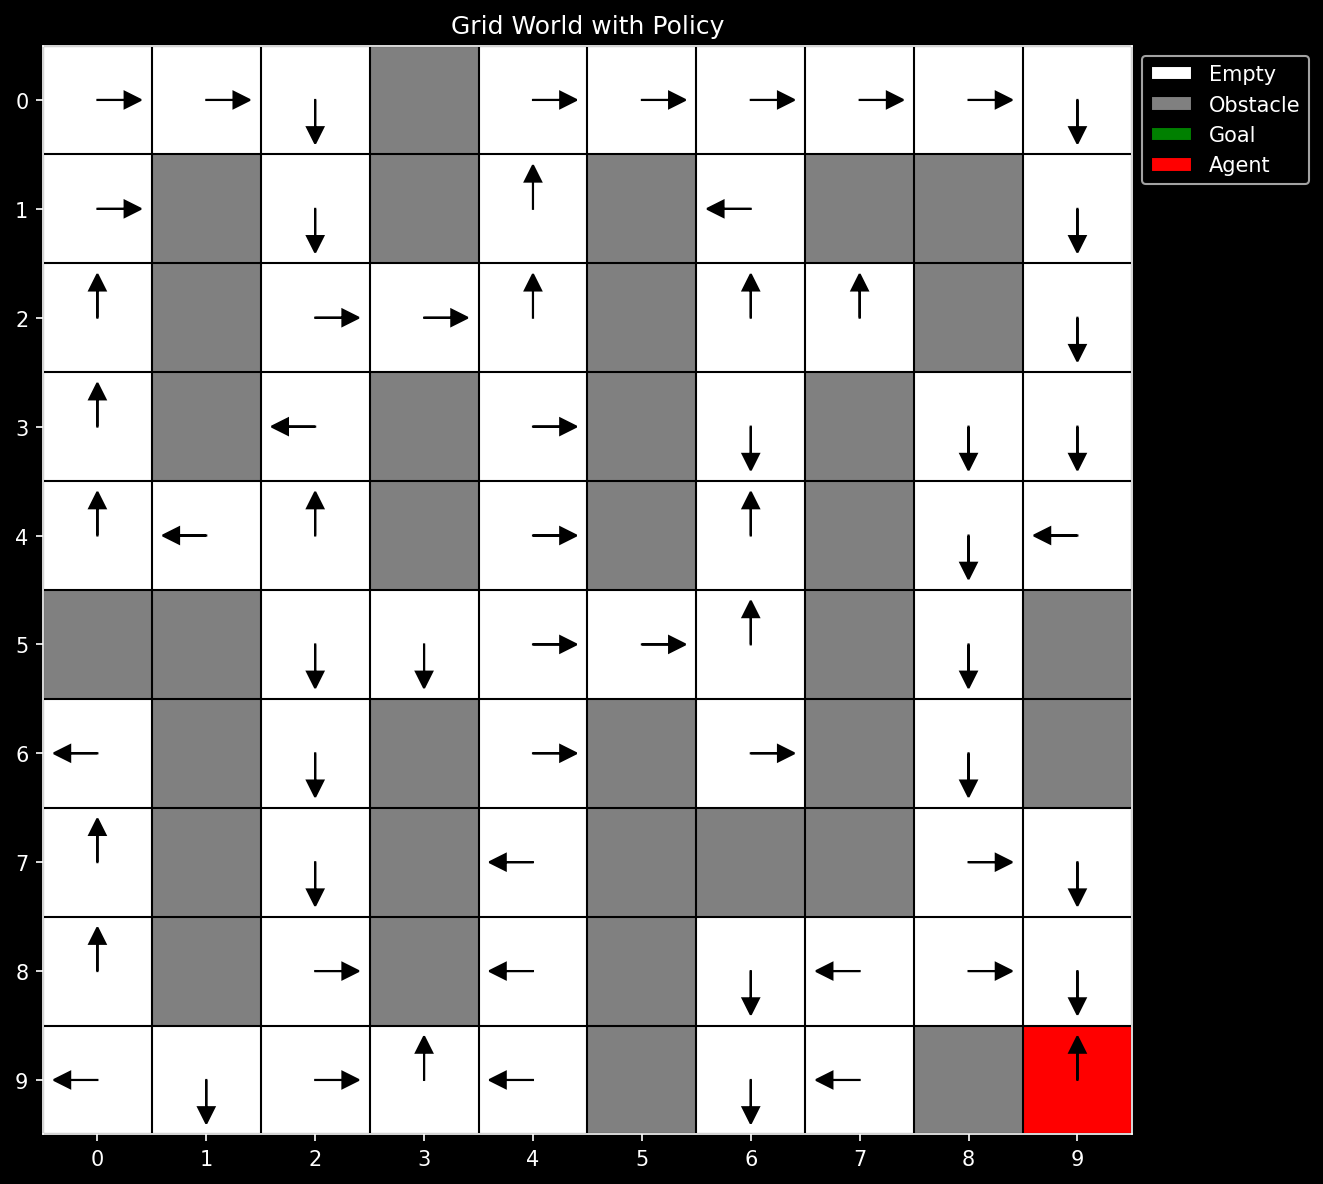

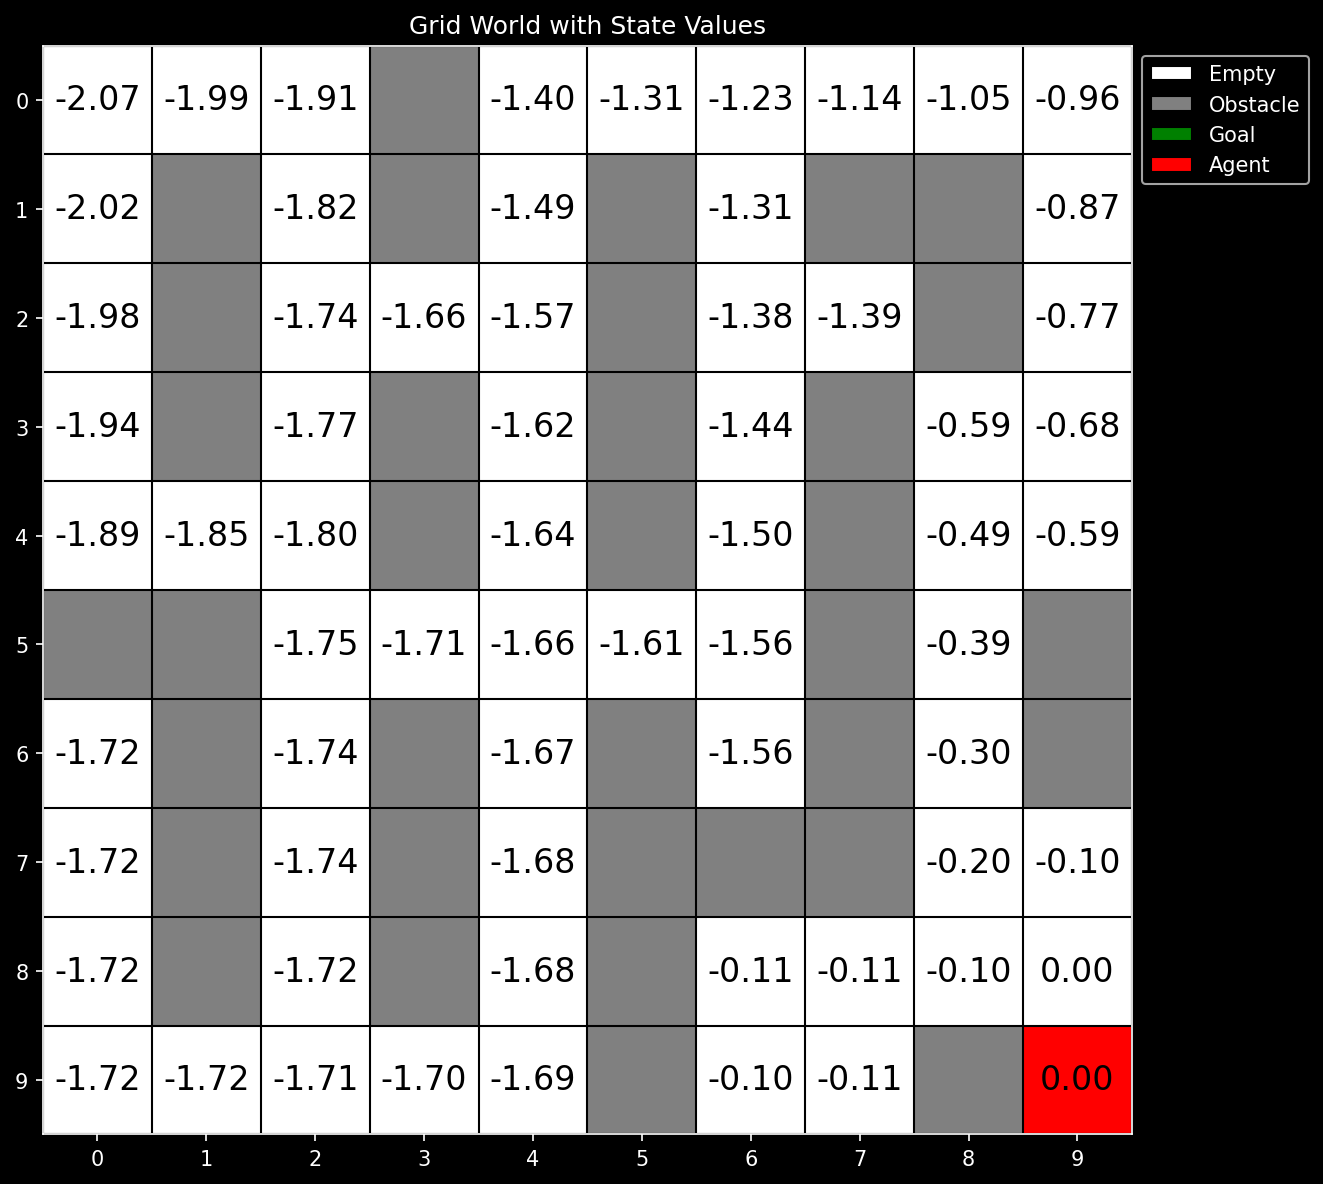

In [5]:
from mini_rl.visualize import visualize_grid_world

visualize_grid_world(env, agent, q_function, plot_type="policy")
visualize_grid_world(env, agent, q_function, plot_type="value")

In [6]:
def run_agent(env, agent, max_steps=200):
    state = env.reset()
    done = False
    step = 0
    while not done and step < max_steps:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        step += 1

        clear_output(wait=True)
        print(env.render())
        sleep(0.1)

    return step


steps = run_agent(env, agent, max_steps=200)
print(f"Ran for {steps} steps")

. . . # . . . . . .
. # . # . # . # # .
. # . . . # . . # .
. # . # . # . # . .
. . . # . # . # . .
# # . . . . . # . #
. # . # . # . # . #
. # . # . # # # . .
. # . # . # . . . .
. . . . . # . . # A

Ran for 24 steps
